# **Data Analysis of Covid-19 Lockdown impact on daily movement**

In this notebook, we will be analysing the impact of Covid-19 Lockdown on daily movement in our Country using Google Community Mobility data. We will be using Pandas and Plotly to perform the analysis.

The data shows how visitors to (or time spent in) categorized places change compared to our baseline days. A baseline day represents a normal value for that day of the week. The baseline day is the median value from the 5‑week period Jan 3 – Feb 6, 2020.

For each region-category, the baseline isn’t a single value—it’s 7 individual values. The same number of visitors on 2 different days of the week, result in different percentage changes

**Place categories** <br>
To make the reports useful, we use categories to group some of the places with similar characteristics for purposes of social distancing guidance. For example, we combine grocery and pharmacy as these tend to be considered essential trips.

lacEach high-level category contains many types of places—some might not be obvious. The following table shows just some of the wide range of places included in 2 example categories:

**Parks**
1. Public garden	
2. Castle	
3. National forest	

**Transit Stations**
1. Subway station
2. Sea Port
3. Car Rental Agency
4. Taxi stand

In [26]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Collection and Cleaning**

In [27]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Global_Mobility_Report.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713528 entries, 0 to 713527
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 712300 non-null  object 
 1   country_region                                      713528 non-null  object 
 2   sub_region_1                                        692333 non-null  object 
 3   sub_region_2                                        411846 non-null  object 
 4   iso_3166_2_code                                     259388 non-null  object 
 5   census_fips_code                                    412004 non-null  float64
 6   date                                                713528 non-null  object 
 7   retail_and_recreation_percent_change_from_baseline  541883 non-null  float64
 8   grocery_and_pharmacy_percent_change_from_baseline   516582 non-n

In [29]:
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


We can observe that there are stats from February 15th to July 21st for each country and each state in that country.

In [30]:
df= df.rename(columns={"sub_region_1":"State","retail_and_recreation_percent_change_from_baseline":"Recreation","grocery_and_pharmacy_percent_change_from_baseline":"Grocery_and_Pharmacy","parks_percent_change_from_baseline":"Parks","transit_stations_percent_change_from_baseline":"Transit_stations",	"workplaces_percent_change_from_baseline":"Workplaces",	"residential_percent_change_from_baseline":"Residential"})

In [31]:
df=df[["country_region","State","date","Recreation","Grocery_and_Pharmacy","Parks","Transit_stations","Workplaces","Residential"]]

### **Extracting only our country's stats**

Let us create a separate dataframe which consists of only India's stats

In [32]:
df_india=df.loc[df["country_region"]== "India"]

In [33]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5846 entries, 126402 to 132247
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_region        5846 non-null   object 
 1   State                 5688 non-null   object 
 2   date                  5846 non-null   object 
 3   Recreation            5688 non-null   float64
 4   Grocery_and_Pharmacy  5555 non-null   float64
 5   Parks                 5809 non-null   float64
 6   Transit_stations      5669 non-null   float64
 7   Workplaces            5846 non-null   float64
 8   Residential           5651 non-null   float64
dtypes: float64(6), object(3)
memory usage: 456.7+ KB


In [34]:
df_india.tail(5)

,country_region,State,date,Recreation,Grocery_and_Pharmacy,Parks,Transit_stations,Workplaces,Residential
132243,India,West Bengal,2020-07-17,-61.0,-7.0,-38.0,-43.0,-31.0,17.0
132244,India,West Bengal,2020-07-18,-63.0,-11.0,-42.0,-44.0,-25.0,16.0
132245,India,West Bengal,2020-07-19,-67.0,-15.0,-46.0,-45.0,-13.0,14.0
132246,India,West Bengal,2020-07-20,-63.0,-15.0,-40.0,-48.0,-34.0,18.0
132247,India,West Bengal,2020-07-21,-66.0,-22.0,-43.0,-51.0,-37.0,19.0


In [35]:
df_india.State.value_counts()

Sikkim                         158
Delhi                          158
Andhra Pradesh                 158
Tamil Nadu                     158
Tripura                        158
Kerala                         158
Madhya Pradesh                 158
Haryana                        158
Jharkhand                      158
Uttarakhand                    158
Arunachal Pradesh              158
Himachal Pradesh               158
Jammu and Kashmir              158
Chhattisgarh                   158
Gujarat                        158
Telangana                      158
Dadra and Nagar Haveli         158
Rajasthan                      158
Andaman and Nicobar Islands    158
Mizoram                        158
Manipur                        158
West Bengal                    158
Karnataka                      158
Goa                            158
Assam                          158
Uttar Pradesh                  158
Meghalaya                      158
Lakshadweep                    158
Punjab              

We can see all states have 158 which implies the mobility data is being tracked for 158 days for all states.

### **Inserting Lockdown Indicators**

In India The lockdown started on March 22nd 2020. So we can divide dates before to Pre-Lockdown and the dates after March 22nd to Post-Lockdown. We will create a column which indicates pre or post lockdown.

Firstly, let us write a function which takes date as input and classifies whether it is pre or post lockdown

In [36]:
def dateconv(date):
  q ="2020-03-22"
  if date < q:
    return "Pre-Lockdown"
  else:
    return "During-Lockdown"
  

In [37]:
df_india["Lockdown"] = df_india["date"].apply(dateconv)

In [38]:
df_india.head()

,country_region,State,date,Recreation,Grocery_and_Pharmacy,Parks,Transit_stations,Workplaces,Residential,Lockdown
126402,India,NaN,2020-02-15,1.0,2.0,3.0,3.0,5.0,0.0,Pre-Lockdown
126403,India,NaN,2020-02-16,2.0,2.0,3.0,2.0,0.0,0.0,Pre-Lockdown
126404,India,NaN,2020-02-17,-1.0,1.0,3.0,1.0,4.0,0.0,Pre-Lockdown
126405,India,NaN,2020-02-18,0.0,2.0,4.0,2.0,3.0,0.0,Pre-Lockdown
126406,India,NaN,2020-02-19,0.0,2.0,1.0,1.0,4.0,1.0,Pre-Lockdown


The lockdown was also implemented in 4 phases. The unlockdown was implemented in 2 phases. We will create another column to indicate the phase

In [39]:
def datephase(date):
  if date < "2020-03-22":
    return "Pre Lockdown" 
  elif date < "2020-04-15":
    return "Lockdown Phase 1"
  elif date < "2020-05-04":
    return "Lockdown Phase 2"
  elif date < "2020-05-18":
    return "Lockdown Phase 3"
  elif date < "2020-06-01":
    return "Lockdown Phase 4"
  elif date < "2020-07-01":
    return "Unlock Phase 1"
  else:
    return "Unlock Phase 2"

In [40]:
df_india["LockdownPhase"] = df_india["date"].apply(datephase)

In [41]:
df_india.tail()

,country_region,State,date,Recreation,Grocery_and_Pharmacy,Parks,Transit_stations,Workplaces,Residential,Lockdown,LockdownPhase
132243,India,West Bengal,2020-07-17,-61.0,-7.0,-38.0,-43.0,-31.0,17.0,During-Lockdown,Unlock Phase 2
132244,India,West Bengal,2020-07-18,-63.0,-11.0,-42.0,-44.0,-25.0,16.0,During-Lockdown,Unlock Phase 2
132245,India,West Bengal,2020-07-19,-67.0,-15.0,-46.0,-45.0,-13.0,14.0,During-Lockdown,Unlock Phase 2
132246,India,West Bengal,2020-07-20,-63.0,-15.0,-40.0,-48.0,-34.0,18.0,During-Lockdown,Unlock Phase 2
132247,India,West Bengal,2020-07-21,-66.0,-22.0,-43.0,-51.0,-37.0,19.0,During-Lockdown,Unlock Phase 2


### **Extracting State's data**

In [42]:
df_india_Telangana_and_AP = df_india[(df_india["State"] == "Telangana") | (df_india["State"] == "Andhra Pradesh")]

In [43]:
df_india_Telangana_and_AP.head()

,country_region,State,date,Recreation,Grocery_and_Pharmacy,Parks,Transit_stations,Workplaces,Residential,Lockdown,LockdownPhase
126718,India,Andhra Pradesh,2020-02-15,-1.0,-1.0,5.0,5.0,4.0,0.0,Pre-Lockdown,Pre Lockdown
126719,India,Andhra Pradesh,2020-02-16,-1.0,1.0,4.0,4.0,-1.0,1.0,Pre-Lockdown,Pre Lockdown
126720,India,Andhra Pradesh,2020-02-17,-1.0,-1.0,4.0,3.0,6.0,0.0,Pre-Lockdown,Pre Lockdown
126721,India,Andhra Pradesh,2020-02-18,-1.0,1.0,4.0,2.0,5.0,0.0,Pre-Lockdown,Pre Lockdown
126722,India,Andhra Pradesh,2020-02-19,-2.0,0.0,4.0,0.0,4.0,0.0,Pre-Lockdown,Pre Lockdown


In [44]:
df_india_Telangana_and_AP.tail()

,country_region,State,date,Recreation,Grocery_and_Pharmacy,Parks,Transit_stations,Workplaces,Residential,Lockdown,LockdownPhase
131611,India,Telangana,2020-07-17,-61.0,-7.0,-58.0,-39.0,-42.0,20.0,During-Lockdown,Unlock Phase 2
131612,India,Telangana,2020-07-18,-61.0,-11.0,-63.0,-39.0,-31.0,17.0,During-Lockdown,Unlock Phase 2
131613,India,Telangana,2020-07-19,-67.0,-18.0,-62.0,-42.0,-18.0,13.0,During-Lockdown,Unlock Phase 2
131614,India,Telangana,2020-07-20,-62.0,-15.0,-60.0,-45.0,-46.0,22.0,During-Lockdown,Unlock Phase 2
131615,India,Telangana,2020-07-21,-60.0,-11.0,-58.0,-40.0,-44.0,19.0,During-Lockdown,Unlock Phase 2


## **Comparing Mobility**

### **Aggregate Statistics**

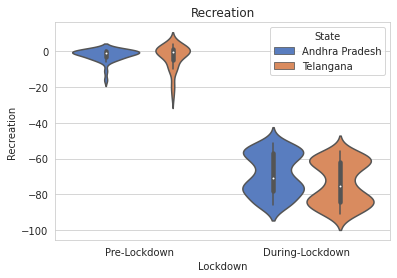

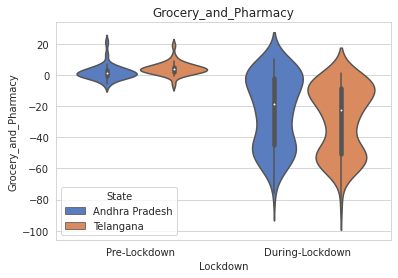

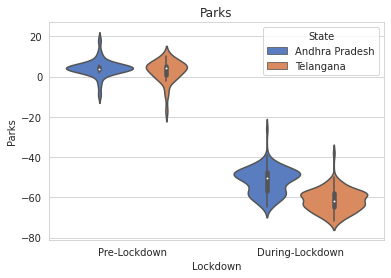

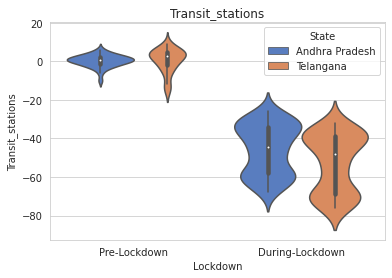

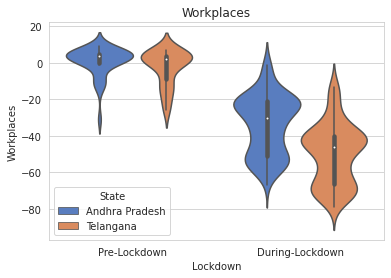

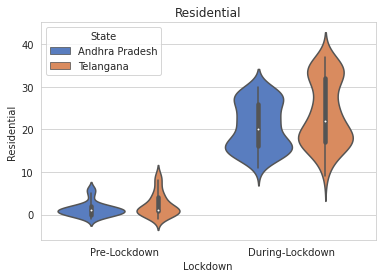

<Figure size 432x288 with 0 Axes>

In [45]:
sns.set_style("whitegrid")
columns = ["Recreation",	"Grocery_and_Pharmacy",	"Parks",	"Transit_stations",	 "Workplaces", 	"Residential"]
for i in columns:
  ax = sns.violinplot(x="Lockdown", y=i, hue="State", data=df_india_Telangana_and_AP, palette="muted")
  ax.set_title(i)
  plt.figure()

In [72]:
columns = ["Recreation",	"Grocery_and_Pharmacy",	"Parks",	"Transit_stations",	 "Workplaces", 	"Residential"]
for i in columns:
  fig = px.box(df_india_Telangana_and_AP, x="Lockdown", y=i, color="State",width=600,height=400,title=i,template="plotly_dark")# or "inclusive", or "linear" by default

  fig.show()

In [47]:
averages_Telangana = df_india_Telangana_and_AP[df_india_Telangana_and_AP["State"]=="Telangana"].mean()
averages_AP = df_india_Telangana_and_AP[df_india_Telangana_and_AP["State"]=="Andhra Pradesh"].mean()

In [48]:
averages_Telangana

Recreation             -57.778481
Grocery_and_Pharmacy   -21.018987
Parks                  -46.867089
Transit_stations       -40.715190
Workplaces             -39.082278
Residential             18.816456
dtype: float64

In [49]:
averages_AP

Recreation             -53.607595
Grocery_and_Pharmacy   -17.417722
Parks                  -38.962025
Transit_stations       -35.126582
Workplaces             -25.753165
Residential             16.215190
dtype: float64

In [74]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=columns,
    y=averages_AP,
    name="AP",
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=columns,
    y=averages_Telangana,
    name='Telangana',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

## **How the world has changed**

In [51]:
import geopandas as gpd


In [52]:
fp = "/content/drive/My Drive/Colab Notebooks/Igismap/Indian_States.shp"
map_df = gpd.read_file(fp)

In [53]:
map_df.replace(to_replace ="Andaman & Nicobar Island", 
                 value ="Andaman and Nicobar Islands", inplace=True) 
map_df.replace(to_replace ="Arunanchal Pradesh", 
                 value ="Arunachal Pradesh", inplace=True)
map_df.replace(to_replace ="NCT of Delhi", 
                 value ="Delhi", inplace=True) 
map_df.replace(to_replace ="Chhattisgarh", 
                 value ="Chhattisgarh", inplace=True) 
map_df.replace(to_replace ="Jammu & Kashmir", 
                 value ="Jammu and Kashmir",inplace=True) 
map_df.replace(to_replace ="Daman & Diu", 
                 value ="Daman and Diu",inplace=True) 
map_df.replace(to_replace ="Dadra & Nagar Haveli", 
                 value ="Dadra and Nagar Haveli",inplace=True) 

## **COmparing phases**

In [54]:
import datetime
df_india_Telangana_and_AP["date"] =pd.to_datetime(df_india_Telangana_and_AP["date"]) 
df_india_Telangana_and_AP.set_index("date",inplace=True)

In [55]:
df_india_Telangana = df_india_Telangana_and_AP[df_india_Telangana_and_AP["State"] == "Telangana"].resample('W').agg("mean")

In [56]:
df_india_AP = df_india_Telangana_and_AP[df_india_Telangana_and_AP["State"] == "Andhra Pradesh"].resample('W').agg("mean")

In [57]:
mindate = df_india_Telangana.index.min()
maxdate = df_india_Telangana.index.max()
lockdown1 = df_india_Telangana_and_AP["LockdownPhase"].where(df_india_Telangana_and_AP["LockdownPhase"]=="Lockdown Phase 1").first_valid_index()
lockdown2 = df_india_Telangana_and_AP["LockdownPhase"].where(df_india_Telangana_and_AP["LockdownPhase"]=="Lockdown Phase 2").first_valid_index()
lockdown3 = df_india_Telangana_and_AP["LockdownPhase"].where(df_india_Telangana_and_AP["LockdownPhase"]=="Lockdown Phase 3").first_valid_index()
lockdown4 = df_india_Telangana_and_AP["LockdownPhase"].where(df_india_Telangana_and_AP["LockdownPhase"]=="Lockdown Phase 4").first_valid_index()
unlock1 = df_india_Telangana_and_AP["LockdownPhase"].where(df_india_Telangana_and_AP["LockdownPhase"]=="Unlock Phase 1").first_valid_index()
unlock2 = df_india_Telangana_and_AP["LockdownPhase"].where(df_india_Telangana_and_AP["LockdownPhase"]=="Unlock Phase 2").first_valid_index()


In [79]:

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[lockdown1,lockdown2,lockdown3,lockdown4,unlock1,unlock2],
    y=[39,39,39,39,39,39],
    text=["Lockdown 1","Lockdown 2","Lockdown 3", "Lockdown 4", "Unlock 1", "Unlock 2"],
    mode="text",
))

l = df_india_Telangana.columns
colors = ['rgba(152, 0, 0, .8)','green','red','orange','MediumPurple','DarkBlue']
for i in range(len(l)):
  fig.add_trace(go.Scatter(x=df_india_Telangana.index, y=df_india_Telangana[l[i]],
                    mode='lines+markers',
                    name=l[i],
                     marker_color=colors[i],
                     ))
  fig.update_layout(xaxis=dict(range=[mindate,maxdate]),template="plotly_white")
  fig.update_layout(
    title= "Mobility Trends in Telangana",
    width=1400,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown1,
            y1=37,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown2,
            y1=37,
            x1=lockdown2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown3,
            y1=37,
            x1=lockdown3,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown4,
            y1=37,
            x1=lockdown4,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock1,
            y1=37,
            x1=unlock1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock2,
            y1=37,
            x1=unlock2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        )
    ]
)

fig.show()


In [80]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[lockdown1,lockdown2,lockdown3,lockdown4,unlock1,unlock2],
    y=[39,39,39,39,39,39],
    text=["Lockdown 1","Lockdown 2","Lockdown 3", "Lockdown 4", "Unlock 1", "Unlock 2"],
    mode="text",
))

l = df_india_AP.columns
colors = ['rgba(152, 0, 0, .8)','green','red','orange','MediumPurple','DarkBlue']
for i in range(len(l)):
  fig.add_trace(go.Scatter(x=df_india_AP.index, y=df_india_AP[l[i]],
                    mode='lines+markers',
                    name=l[i],
                    marker_color=colors[i],
                    ))
fig.update_layout(xaxis=dict(range=[mindate,maxdate]),template="plotly_white")
fig.update_layout(
    title= "Mobility Trends in Andhra Pradesh",
    width=1400,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown1,
            y1=37,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown2,
            y1=37,
            x1=lockdown2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown3,
            y1=37,
            x1=lockdown3,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown4,
            y1=37,
            x1=lockdown4,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock1,
            y1=37,
            x1=unlock1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock2,
            y1=37,
            x1=unlock2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        )
    ]
)

fig.show()


### **Is work back to normal?**

In [85]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[lockdown1,lockdown2,lockdown3,lockdown4,unlock1,unlock2],
    y=[39,39,39,39,39,39],
    text=["Lockdown 1","Lockdown 2","Lockdown 3", "Lockdown 4", "Unlock 1", "Unlock 2"],
    mode="text",
))
fig.add_trace(go.Scatter(x=df_india_AP.index, y=df_india_AP["Workplaces"],
                    mode='lines+markers',
                    name="AP",
                    ))
fig.add_trace(go.Scatter(x=df_india_Telangana.index, y=df_india_Telangana["Workplaces"],
                    mode='lines+markers',
                    name="Telangana",
                    ))
fig.update_layout(xaxis=dict(range=[mindate,maxdate]),template="seaborn")
fig.update_layout(
    title= "Is work back to normal?",
    width=1300,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown1,
            y1=37,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown2,
            y1=37,
            x1=lockdown2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown3,
            y1=37,
            x1=lockdown3,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown4,
            y1=37,
            x1=lockdown4,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock1,
            y1=37,
            x1=unlock1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock2,
            y1=37,
            x1=unlock2,
            line_width=2,
            line = dict(
                dash = "dot"
            ) 
        ),
    ]
)

fig.show()


### **Are people still going to recreational facilities**

In [61]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[lockdown1,lockdown2,lockdown3,lockdown4,unlock1,unlock2],
    y=[39,39,39,39,39,39],
    text=["Lockdown 1","Lockdown 2","Lockdown 3", "Lockdown 4", "Unlock 1", "Unlock 2"],
    mode="text",
))
fig.add_trace(go.Scatter(x=df_india_AP.index, y=df_india_AP["Recreation"],
                    mode='lines+markers',
                    name="AP",
                    ))
fig.add_trace(go.Scatter(x=df_india_Telangana.index, y=df_india_Telangana["Recreation"],
                    mode='lines+markers',
                    name="Telangana",
                    ))
fig.update_layout(xaxis=dict(range=[mindate,maxdate]))
fig.update_layout(
    title= "Are people still going to Recreational Facilities?",
    width=1300,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown1,
            y1=37,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown2,
            y1=37,
            x1=lockdown2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown3,
            y1=37,
            x1=lockdown3,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown4,
            y1=37,
            x1=lockdown4,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock1,
            y1=37,
            x1=unlock1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock2,
            y1=37,
            x1=unlock2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        )
    ]
)

fig.show()


### **How about Parks?**

In [62]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[lockdown1,lockdown2,lockdown3,lockdown4,unlock1,unlock2],
    y=[39,39,39,39,39,39],
    text=["Lockdown 1","Lockdown 2","Lockdown 3", "Lockdown 4", "Unlock 1", "Unlock 2"],
    mode="text",
))
fig.add_trace(go.Scatter(x=df_india_AP.index, y=df_india_AP["Parks"],
                    mode='lines+markers',
                    name="AP",
                    ))
fig.add_trace(go.Scatter(x=df_india_Telangana.index, y=df_india_Telangana["Parks"],
                    mode='lines+markers',
                    name="Telangana",
                    ))
fig.update_layout(xaxis=dict(range=[mindate,maxdate]))
fig.update_layout(
    title= "How about Parks?",
    width=1300,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown1,
            y1=37,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown2,
            y1=37,
            x1=lockdown2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown3,
            y1=37,
            x1=lockdown3,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown4,
            y1=37,
            x1=lockdown4,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock1,
            y1=37,
            x1=unlock1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock2,
            y1=37,
            x1=unlock2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        )
    ]
)

fig.show()


### **Are people staying in their homes?**

In [63]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[lockdown1,lockdown2,lockdown3,lockdown4,unlock1,unlock2],
    y=[39,39,39,39,39,39],
    text=["Lockdown 1","Lockdown 2","Lockdown 3", "Lockdown 4", "Unlock 1", "Unlock 2"],
    mode="text",
))
fig.add_trace(go.Scatter(x=df_india_AP.index, y=df_india_AP["Residential"],
                    mode='lines+markers',
                    name="AP",
                    ))
fig.add_trace(go.Scatter(x=df_india_Telangana.index, y=df_india_Telangana["Residential"],
                    mode='lines+markers',
                    name="Telangana",
                    ))
fig.update_layout(xaxis=dict(range=[mindate,maxdate]))
fig.update_layout(
    title= "Are people staying in their homes?",
    width=1300,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown1,
            y1=37,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown2,
            y1=37,
            x1=lockdown2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown3,
            y1=37,
            x1=lockdown3,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown4,
            y1=37,
            x1=lockdown4,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock1,
            y1=37,
            x1=unlock1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock2,
            y1=37,
            x1=unlock2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        )
    ]
)

fig.show()


In [86]:
covid_data=pd.read_csv('cindia.csv')

In [87]:
covid_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [88]:
covid_data_telengana = covid_data[covid_data["State/UnionTerritory"] =="Telangana"]

In [89]:
covid_data_AP = covid_data[covid_data["State/UnionTerritory"] =="Andhra Pradesh"]

In [90]:
covid_data_telengana.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
32,33,02/03/20,6:00 PM,Telangana,1,0,0,0,1
35,36,03/03/20,6:00 PM,Telangana,1,0,0,0,1
43,44,04/03/20,6:00 PM,Telangana,1,0,0,0,1
49,50,05/03/20,6:00 PM,Telangana,1,0,0,0,1
56,57,06/03/20,6:00 PM,Telangana,1,0,0,0,1


In [91]:
covid_data_telengana = covid_data_telengana[["Date","Confirmed"]]
covid_data_AP = covid_data_AP[["Date","Confirmed"]]


In [92]:
covid_data_AP.tail()

,Date,Confirmed
4287,20/07/20,49650
4322,21/07/20,53724
4357,22/07/20,58668
4392,23/07/20,64713
4427,24/07/20,72711


In [93]:
covid_data_telengana.tail()

,Date,Confirmed
4316,20/07/20,45076
4351,21/07/20,46274
4386,22/07/20,47705
4421,23/07/20,49259
4456,24/07/20,50826


In [94]:
covid_data_telengana["Confirmed"] = covid_data_telengana["Confirmed"].diff()
covid_data_AP["Confirmed"] = covid_data_AP["Confirmed"].diff()

In [95]:
covid_data_telengana.dropna(inplace=True)
covid_data_AP.dropna(inplace=True)

In [96]:
covid_data_telengana.head()

,Date,Confirmed
35,03/03/20,0.0
43,04/03/20,0.0
49,05/03/20,0.0
56,06/03/20,0.0
60,07/03/20,0.0


In [97]:
def dateconversion(date):
  return datetime.datetime.strptime(date, "%d/%m/%y").strftime("%Y-%m-%d")

In [98]:
covid_data_telengana["Date"] = covid_data_telengana["Date"].apply(dateconversion)
covid_data_AP["Date"] = covid_data_AP["Date"].apply(dateconversion)

In [99]:
covid_data_telengana["Date"] =pd.to_datetime(covid_data_telengana["Date"]) 
covid_data_telengana.set_index("Date",inplace=True)
covid_data_AP["Date"] =pd.to_datetime(covid_data_AP["Date"]) 
covid_data_AP.set_index("Date",inplace=True)

In [100]:
covid_data_telengana = covid_data_telengana.resample('W').agg("mean")
covid_data_AP = covid_data_AP.resample('W').agg("mean")

In [101]:
covid_data_AP.tail()

,Confirmed
Date,
2020-06-28,547.571429
2020-07-05,773.428571
2020-07-12,1362.285714
2020-07-19,2482.000000
2020-07-26,5620.400000


In [102]:
covid_data_telengana.tail()

,Confirmed
Date,
2020-06-28,909.142857
2020-07-05,1268.000000
2020-07-12,1584.285714
2020-07-19,1482.571429
2020-07-26,1409.200000


In [104]:
from plotly.subplots import make_subplots
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[lockdown1,lockdown2,lockdown3,lockdown4,unlock1,unlock2],
    y=[5620,5620,5620,5620,5620,5620],
    text=["Lockdown 1","Lockdown 2","Lockdown 3", "Lockdown 4", "Unlock 1", "Unlock 2"],
    mode="text",
))
fig.add_trace(go.Scatter(x=covid_data_telengana.index, y=covid_data_telengana["Confirmed"],
                    mode='lines+markers',
                    name="Telangana Cases",
                    ),
)
fig.add_trace(go.Scatter(x=covid_data_AP.index, y=covid_data_AP["Confirmed"],
                    mode='lines+markers',
                    name="AP Cases",
                    ),
)
fig.update_layout(xaxis=dict(range=[mindate,maxdate]))
fig.update_layout(
    title= "COVID-19 Cases",
    width=1300,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=0,
            x0= lockdown1,
            y1=5620,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=0,
            x0= lockdown2,
            y1=5620,
            x1=lockdown2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=0,
            x0= lockdown3,
            y1=5620,
            x1=lockdown3,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=0,
            x0= lockdown4,
            y1=5620,
            x1=lockdown4,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=0,
            x0= unlock1,
            y1=5620,
            x1=unlock1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=0,
            x0= unlock2,
            y1=5620,
            x1=unlock2,
            line_width=2,
            line = dict(
                dash = "dot"
            ) 
        ),
    ]
)

fig.show()
